## Mira Attractor
Still in progress...

The Gumowski-Mira equation was developed in 1980 at CERN by I. Gumowski and C. Mira to calculate the trajectories of sub-atomic particles. The main equation is as follows:

- I think this is just the **Mira fractal**

\begin{equation}
f(x) = a x + \frac{2(1- a) x^2}{ (1 + x^2)}
\end{equation}
**Note: The square in denominator for the second term gives different results**

https://demonstrations.wolfram.com/StrangeAttractorOfGumowskiMira/

Using that equation, we can iterate the following formulas to calculate sequential $x$,$y$ location

\begin{equation}
x_{n + 1} = b y _{n} + f(x_n),\quad y_{n +1} = f(x_{n + 1})  - x_{n}
\end{equation}

### Plotting options 

In [1]:
import numpy as np, pandas as pd, datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import inferno, viridis
from numba import jit
import numba
from functools import partial
from datashader.utils import export_image
background = "white"
import sys
ds.transfer_functions.Image.border = 0

For saving figures we use `partial` and `export_image`. 

In [2]:
img_map = partial(export_image, export_path="Gmira_maps", background=background)

### Mira

In [3]:
@jit
def f(x, a):
    return a * x + 2 * (1 - a) * x**2 / (1.0 + x**2)
@jit
def mira_map(x, y, a, b):
    xn = b * y + f(x, a)
    yn = -x + f(xn, a)
    return xn, yn

### Let's see Mira 

In [4]:
n = 10000000
@jit
def trajectorym(a=0.2, b=1, x0=12, y0=0, n=n):
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    for i in np.arange(n-1):
        x[i+1], y[i+1] = mira_map(x[i], y[i], a, b)
    return pd.DataFrame(dict(x=x,y=y))

In [5]:
df = trajectorym(a = .2, b = 1, x0 = 12, y0 = 0)

In [6]:
df.head()

x         y
0  12.000000  0.000000
1   3.988966 -9.696815
2  -7.393630 -3.896435
3  -3.803904  8.129421
4   8.865213  7.156844

In [7]:
wb  = ["white", "black"]

In [8]:
cvs = ds.Canvas(plot_width = 600, plot_height = 600)
agg = cvs.points(df, 'x', 'y')
img = tf.shade(agg, cmap = wb)

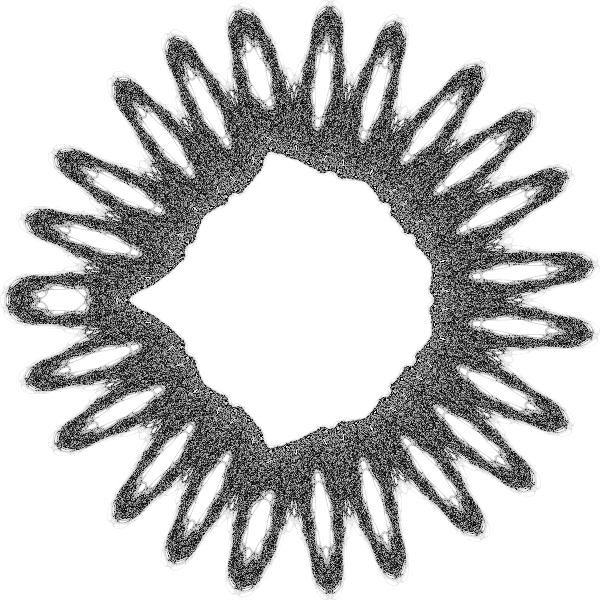

In [9]:
tf.dynspread(img)

#### Colors

Now, a set of suitable colormaps can be found in `colorcet` as follows.

In [10]:
from colorcet import palette
cmaps =  [palette[p] for p in ['bgy', 'bmw', 'bgyw', 'bmy','fire', 'gray', 'kbc', 'kgy']]
cmaps += [inferno[::-1], viridis[::-1]]

See http://holoviews.org/user_guide/Colormaps.html for more info. 

In [11]:
def plotM(mira_map, a = .2, b = 1, x0 = 12, y0 = 0, n=n, cmap=wb):
    df = trajectorym(a, b, x0, y0)
    cvs = ds.Canvas(plot_width = 600, plot_height = 600)
    agg = cvs.points(df, 'x', 'y')
    img = tf.shade(agg, cmap=cmap)
    return img

The following values are from http://mathworld.wolfram.com/MiraFractal.html

In [12]:
cvals = [
     (-.77, .95, .6, .1),
     (.31, 1, .6, .1), # I changed initial conditions
    (-.23, 1, 6, .1), # I changed initial conditions
    (.2, 1, 12, 0),
    (.4, 1, 6, 4),
    (.7, 0.9998, 9,0),
    (.7,.9998, 12.1,0),
    (.7, .9998, 8,1), # I changed initial conditions
]

In [13]:
miraSet = [plotM(mira_map, *cvals[i], cmap=cmaps[(i+1)%len(cmaps)])
           for i in range(len(cvals))]


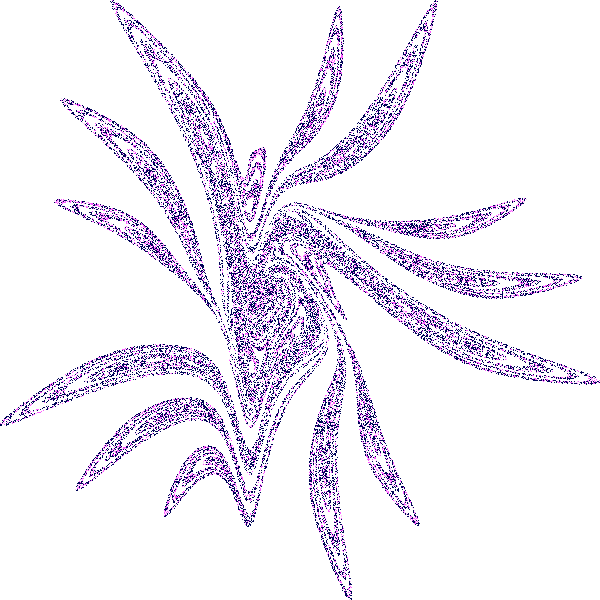
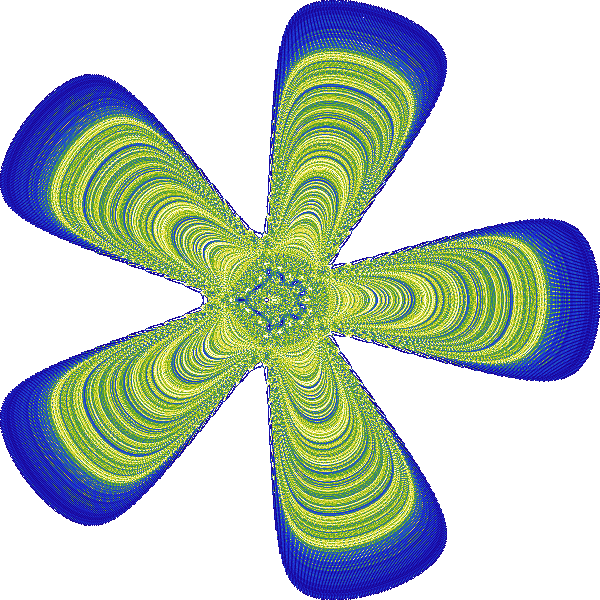
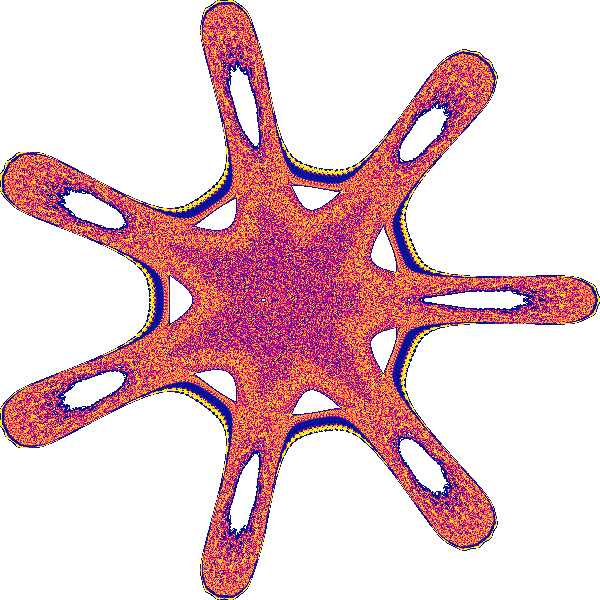
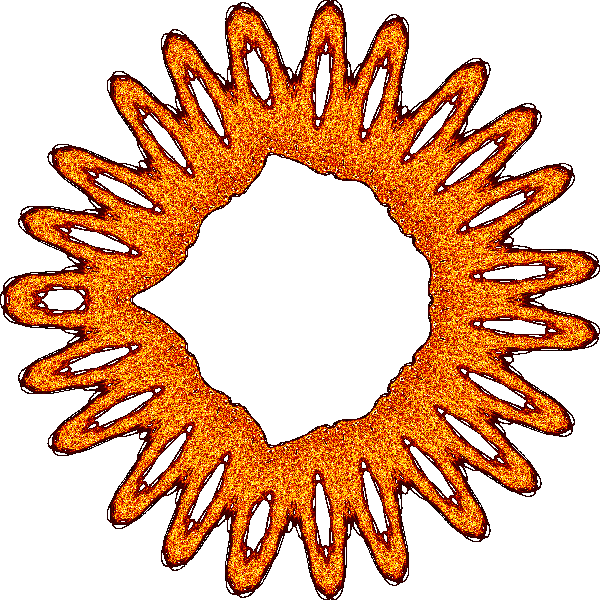
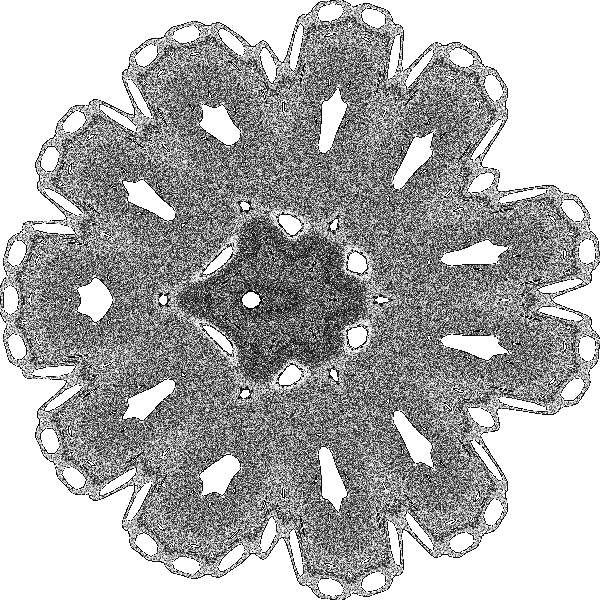
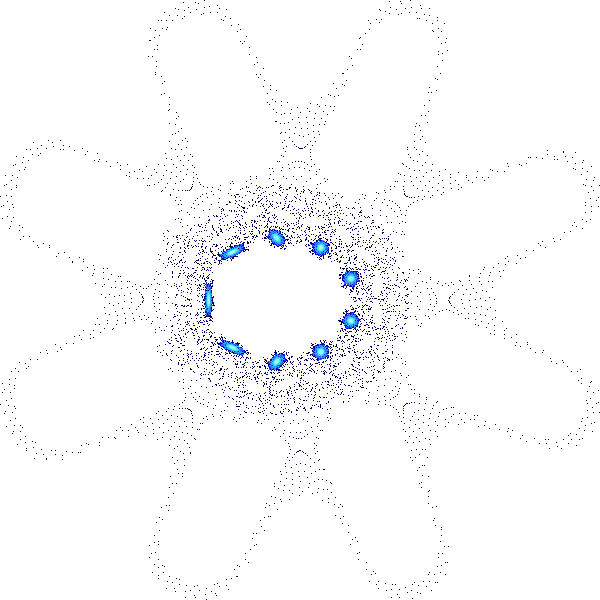
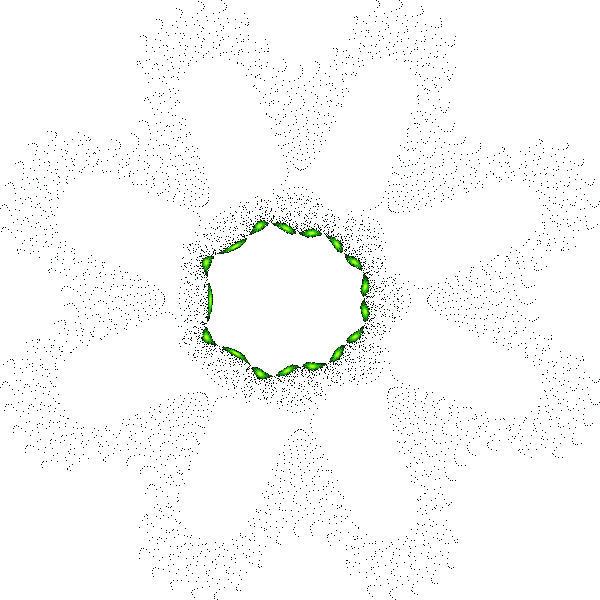
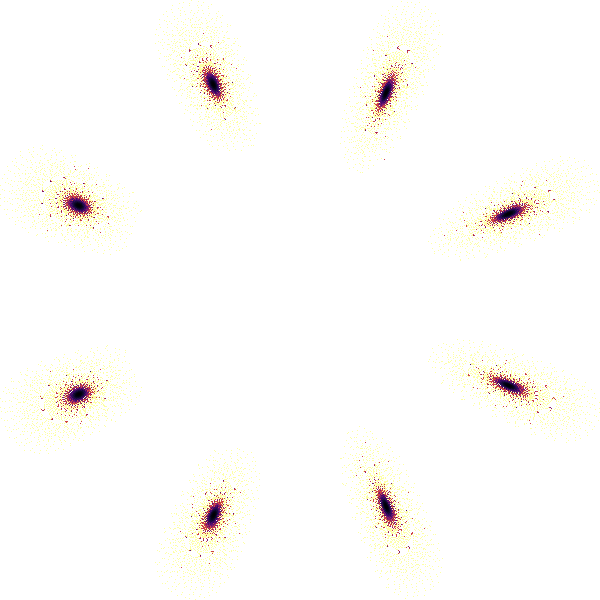

In [14]:
tf.Images(*miraSet).cols(4)

### Now Gumowski-Mira
http://www.scipress.org/journals/forma/pdf/2102/21020151.pdf

http://kgdawiec.bplaced.net/badania/pdf/cacs_2010.pdf

http://shodhganga.inflibnet.ac.in/bitstream/10603/22501/11/11_chapter3.pdf

\begin{equation}
G(x, \mu) = \mu x + \frac{2(1- \mu) x^2}{ (1 + x^2)}
\end{equation}

\begin{equation}
x_{n + 1} = y _{n} + a (1 - by_{n}^2)y_{n} + G(x_n),\quad y_{n +1} = G(x_{n + 1}, \mu)  - x_{n}
\end{equation}

In [15]:
@jit
def g(x, μ):
    return μ * x + 2 * (1 - μ) * x**2 / (1.0 + x**2)
@jit
def Gmira_map(x, y, a, b, μ):
    xn = y + a*(1 - b*y**2)*y  +  g(x, μ)
    yn = -x + g(xn, μ)
    return xn, yn

In [16]:
n = 10000000
@jit
def trajectoryGm(a, b, μ , x0=.1, y0=0.1, n=n):
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    for i in np.arange(n-1):
        x[i+1], y[i+1] = Gmira_map(x[i], y[i], a, b, μ)
    return pd.DataFrame(dict(x=x,y=y))

In [17]:
cvals = [
    (.008, .05, .9, 0.1, 0.1),
    (.0, .5, -.75, 0.1, 0.1),
    (.0, .5, -.7509, 0.1, 0.1),
    (.0, .5, -.65, 0.1, 0.1),
    (.0, .5, -.115, 4, 1),
    (.0, .5, -.32, 4, 1),
    (.0, .5, -.22, 0, 1),
    
]

In [18]:
def plotGmira(Gmira_map, a = .2, b = 1, μ = -.9, x0 = 12, y0 = 0, n=n, cmap=wb):
    df = trajectoryGm(a, b, μ, x0, y0)
    cvs = ds.Canvas(plot_width = 600, plot_height = 600)
    agg = cvs.points(df, 'x', 'y')
    img = tf.shade(agg, cmap=cmap)
    return img

In [19]:
cmaps =  [palette[p][::-1] for p in ['bgy', 'bmw', 'bgyw', 'bmy','fire', 'gray', 'kbc', 'kgy']]
cmaps += [inferno[::-1], viridis[::-1]]

In [20]:
gmSet = [plotGmira(Gmira_map, *cvals[i], cmap=cmaps[(i+2)%len(cmaps)])
           for i in range(len(cvals))]


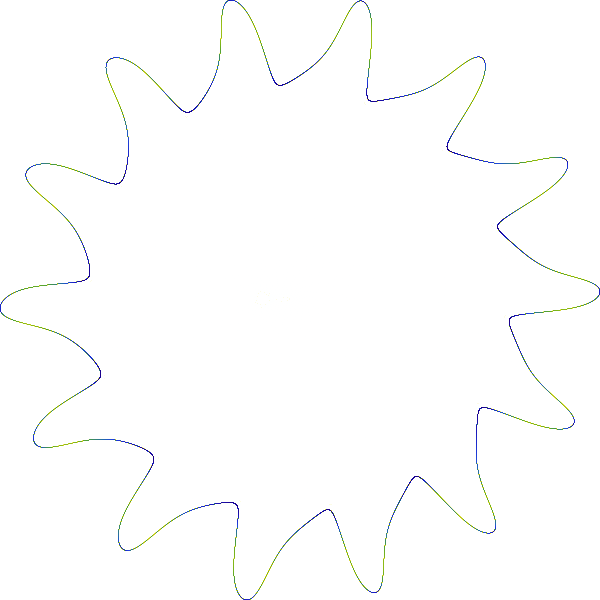
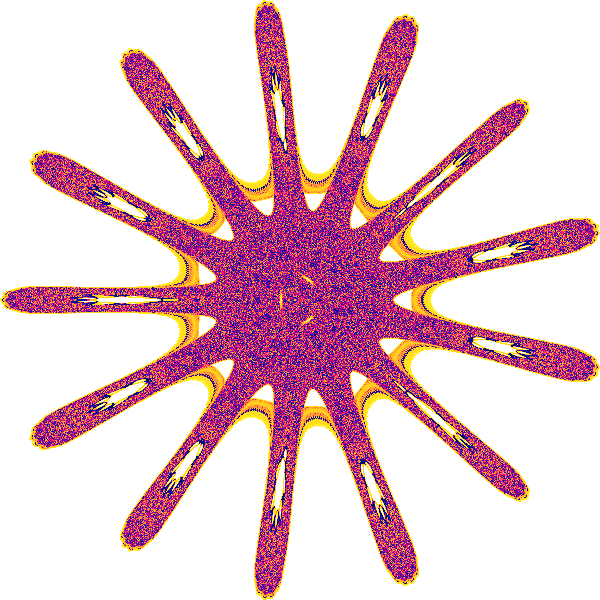
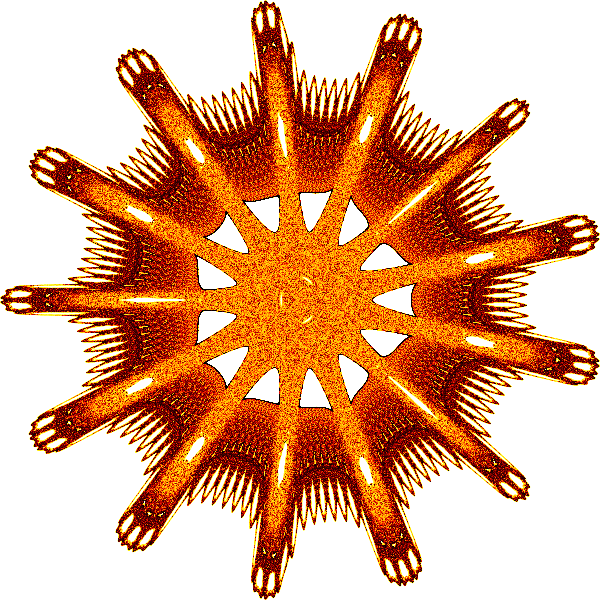
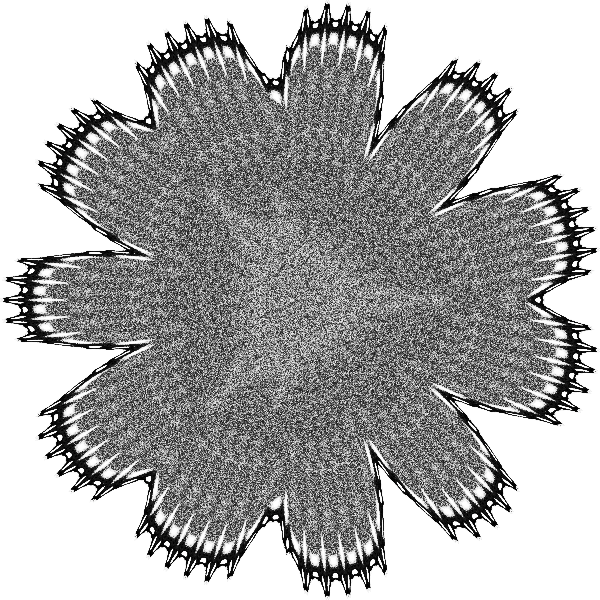
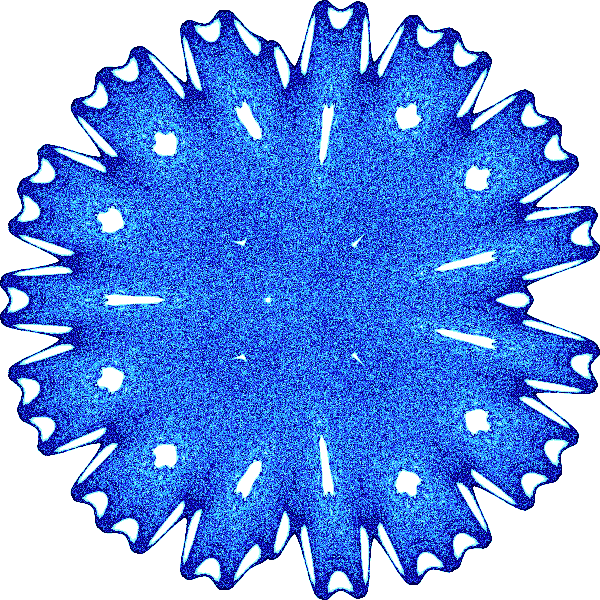
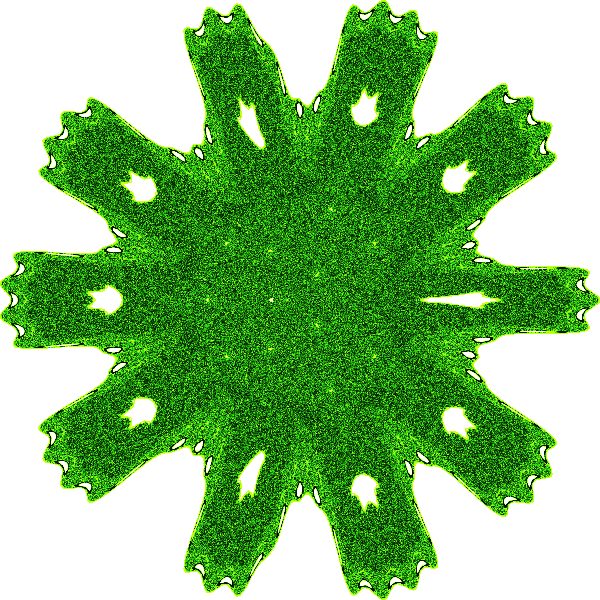
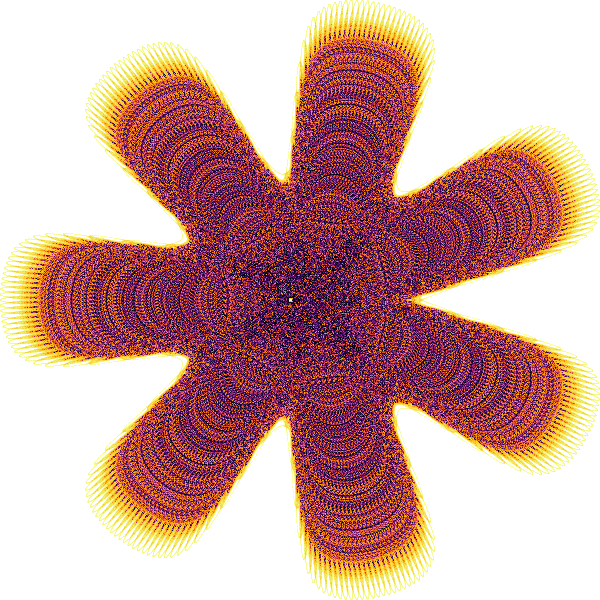

In [21]:
tf.Images(*gmSet).cols(4)

### Packages, version control

In [22]:
print(f"Python version: {sys.version}")
print(" ")
print("numpy == ", np.__version__)
print("pandas == ", pd.__version__)
print("datashader == ", ds.__version__)
print("numba == ", numba.__version__)

Python version: 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
 
numpy ==  1.14.0
pandas ==  0.22.0
datashader ==  0.6.5
numba ==  0.36.2
